# Fashion MNIST model using Tensorflow

## Import Necessary Libraries

In [60]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Split into test set and train set

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Data preprocessing

### Normalization

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshaping data for CNN

In [22]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

### One Hot Encoding

In [23]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### data augmentation

In [24]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

### fitting Augmented data on training set

In [25]:
# Fit the data generator on the training data
datagen.fit(X_train)

## Model Creation

### Definition of CNN

In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding Dropout to reduce overfitting
    Dense(10, activation='softmax')
])

C:\Users\umerj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling Model

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

In [28]:
# Train the model using data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), 
                    validation_data=(X_test, y_test), 
                    epochs=10)


Epoch 1/10


C:\Users\umerj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 63ms/step - accuracy: 0.6009 - loss: 1.0916 - val_accuracy: 0.8017 - val_loss: 0.5108
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 77ms/step - accuracy: 0.7643 - loss: 0.6249 - val_accuracy: 0.8366 - val_loss: 0.4414
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.7876 - loss: 0.5629 - val_accuracy: 0.8465 - val_loss: 0.4144
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.8096 - loss: 0.5101 - val_accuracy: 0.8527 - val_loss: 0.3829
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8223 - loss: 0.4878 - val_accuracy: 0.8633 - val_loss: 0.3731
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.8278 - loss: 0.4614 - val_accuracy: 0.8723 - val_loss: 0.3464
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.8354 - loss: 0.4476 - val_accuracy: 0.8790 - val_loss: 0.3356
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8412 - loss: 0.4274 - val_accurac

## Evaluation

### Testing model and evaluation

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc * 100:.2f}%')

313/313 - 1s - 4ms/step - accuracy: 0.8828 - loss: 0.3235

 Test accuracy: 88.28%


### making predictions and postprocessing

In [56]:

# Assuming the model and test data (X_test, y_test) are already loaded
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_test is already in class label format
y_true_classes = y_test

# Predictions are already computed
y_pred_classes = np.argmax(y_pred, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8828


### Generating Classification Report

In [58]:
# Generate a classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.88      0.74      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.80      0.83      0.82      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.62      0.69      0.65      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



### Confusion matrix

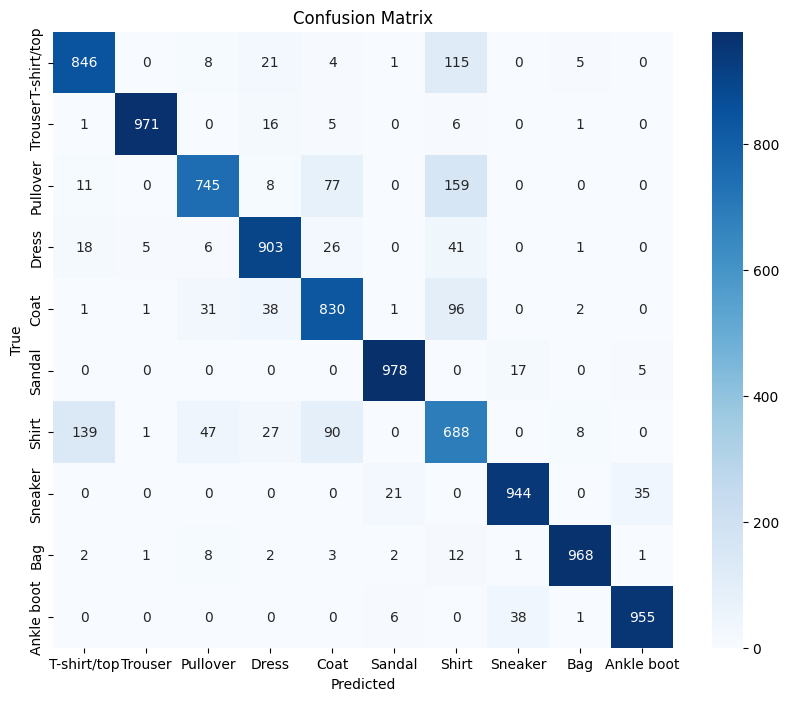

In [59]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Plotting model accuracy

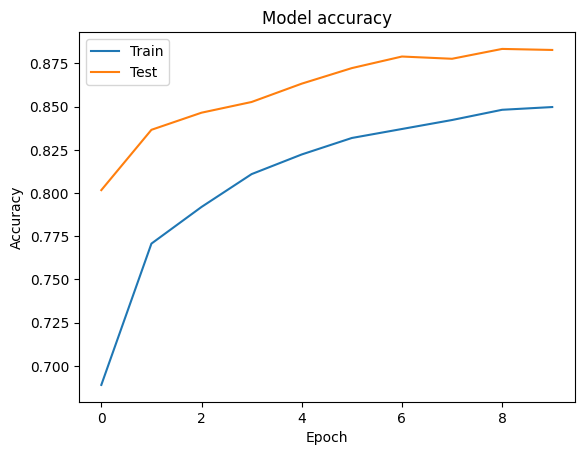

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### plotting model loss

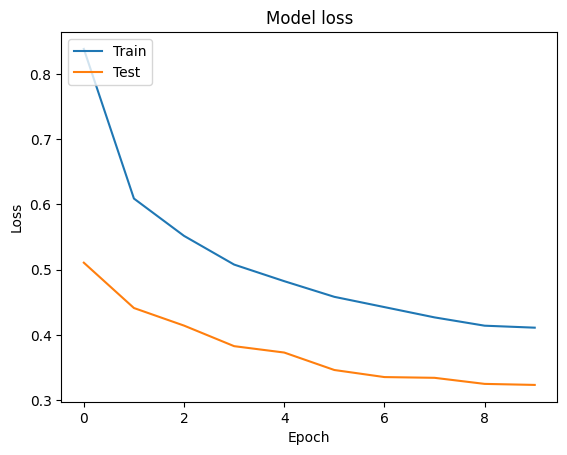

In [34]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Saving the trained model

In [35]:
# Save the trained model
model.save('fashion_mnist_cnn.h5')

### Making prediction on random test set image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class: Sneaker
True class: Sneaker


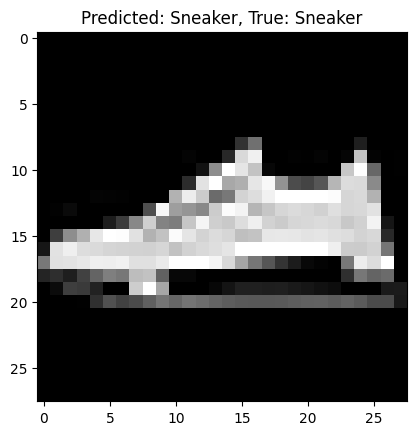

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(_, _), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape the test data
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

# Pick a random index from the test set
random_index = np.random.randint(0, len(X_test))

# Get the random image and its true label
random_image = X_test[random_index]
true_label = y_test[random_index]

# Load the trained model (if not already loaded)
model = tf.keras.models.load_model('fashion_mnist_cnn.h5')

# Predict the class of the random image
random_image_batch = np.expand_dims(random_image, axis=0)  # Add batch dimension
predictions = model.predict(random_image_batch)
predicted_class = np.argmax(predictions[0])

# Class labels corresponding to Fashion MNIST dataset
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f'Predicted class: {class_labels[predicted_class]}')
print(f'True class: {class_labels[true_label]}')

# Visualize the random image and the prediction
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {class_labels[predicted_class]}, True: {class_labels[true_label]}')
plt.show()
